In [34]:
import pandas as pd

In [51]:
data_without_fullcity = pd.read_csv("823rows.csv")
city_data = pd.read_csv("whole_quarter+cities2.csv")

In [52]:
city_data = city_data[["EVENT_ID", "population"]]
full_data = pd.merge(city_data, data_without_fullcity, on = "EVENT_ID", how = "right")
full_data = full_data.drop(columns = "population_y" )
full_data = full_data.rename(columns={"population_x" : "population"})
full_data.columns

Index(['EVENT_ID', 'population', 'Unnamed: 0.1', 'Unnamed: 0', 'EVENT_NAME', 'EVENT_START_DATETIME', 'EVENT_END_DATETIME', 'CLASSIFICATION_GENRE', 'CLASSIFICATION_SUB_GENRE', 'MIN_PRICE', 'MAX_PRICE', 'ATTRACTION_NAME', 'ATTRACTION_ID', 'VENUE_NAME', 'VENUE_ID', 'VENUE_STREET', 'VENUE_CITY', 'VENUE_STATE_CODE', 'VENUE_TIMEZONE', 'CLASSIFICATION_TYPE', 'CLASSIFICATION_SUB_TYPE', 'ATTRACTION_CLASSIFICATION_SEGMENT', 'ATTRACTION_CLASSIFICATION_GENRE', 'ATTRACTION_CLASSIFICATION_SUB_GENRE', 'ATTRACTION_CLASSIFICATION_TYPE', 'ATTRACTION_CLASSIFICATION_SUB_TYPE', 'TRANSACTABLE', 'HOT_EVENT', 'scrape_time', 'city', 'city_ascii', 'state_id', 'state_name', 'CAPACITY', 'individual_artist', 'id', 'name', 'artist_popularity', 'artist_genres', 'followers', 'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'lower_name'], dtype='object')

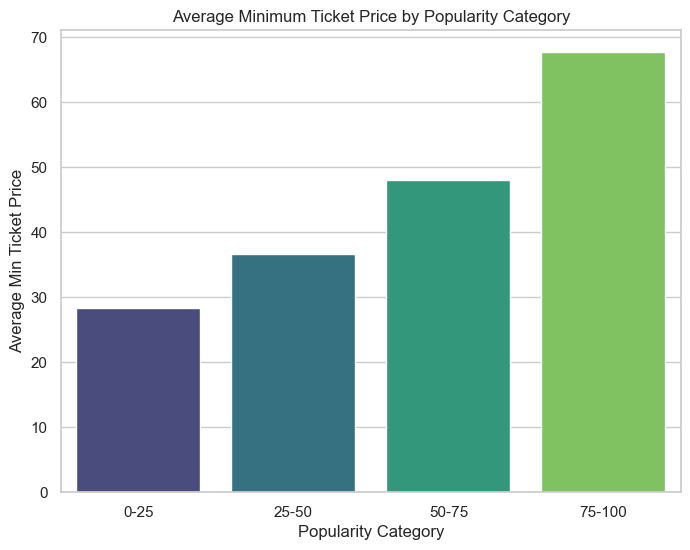

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the popularity bins and labels
bins = [0, 25, 50, 75, 100]
labels = ["0-25", "25-50", "50-75", "75-100"]

# Create a new column for popularity category
full_data["popularity_category"] = pd.cut(full_data["artist_popularity"], bins=bins, labels=labels, include_lowest=True)

# Group by popularity category and calculate the average MIN_PRICE
min_price_by_category = full_data.groupby("popularity_category")["MIN_PRICE"].mean().reset_index()

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a Seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=min_price_by_category, x="popularity_category", y="MIN_PRICE", palette="viridis")

# Labels and title
plt.xlabel("Popularity Category")
plt.ylabel("Average Min Ticket Price")
plt.title("Average Minimum Ticket Price by Popularity Category")

# Show the plot
plt.show()


In [41]:
full_data.shape


(823, 49)

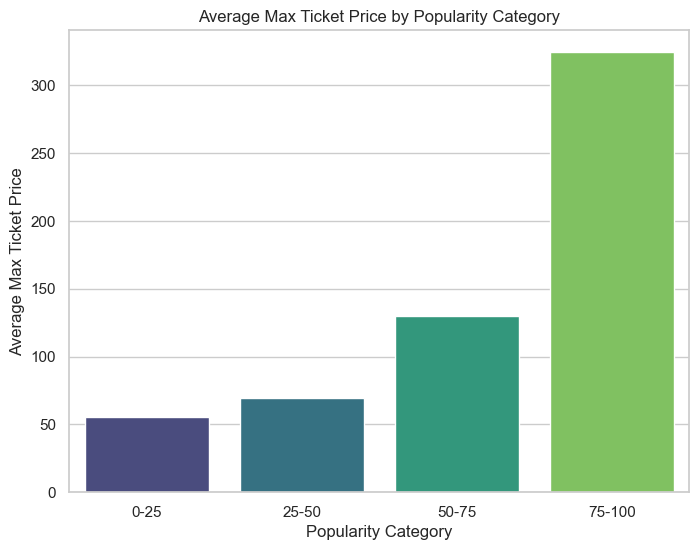

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the popularity bins and labels
bins = [0, 25, 50, 75, 100]
labels = ["0-25", "25-50", "50-75", "75-100"]

# Create a new column for popularity category
full_data["popularity_category"] = pd.cut(full_data["artist_popularity"], bins=bins, labels=labels, include_lowest=True)

# Group by popularity category and calculate the average MAX_PRICE
min_price_by_category = full_data.groupby("popularity_category")["MAX_PRICE"].mean().reset_index()

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=min_price_by_category, x="popularity_category", y="MAX_PRICE", palette="viridis")

# Labels and title
plt.xlabel("Popularity Category")
plt.ylabel("Average Max Ticket Price")
plt.title("Average Max Ticket Price by Popularity Category")

# Show the plot
plt.show()


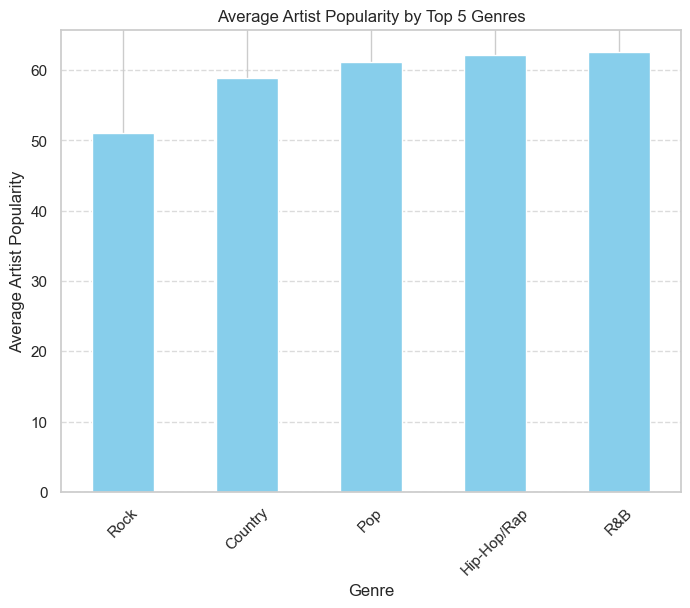

In [54]:
# Load the dataset again to ensure it's available
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

# Check if the required columns exist
if "CLASSIFICATION_GENRE" in full_data.columns and "artist_popularity" in full_data.columns:
    # Identify the top 5 genres based on frequency
    top_5_genres = full_data["CLASSIFICATION_GENRE"].value_counts().head(5).index

    # Filter dataset to only include the top 5 genres
    filtered_df = full_data[full_data["CLASSIFICATION_GENRE"].isin(top_5_genres)]

    # Calculate the average artist popularity for each of the top 5 genres
    avg_popularity_by_genre = filtered_df.groupby("CLASSIFICATION_GENRE")["artist_popularity"].mean().sort_values()

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    avg_popularity_by_genre.plot(kind="bar", color="skyblue")

    # Labels and title
    plt.xlabel("Genre")
    plt.ylabel("Average Artist Popularity")
    plt.title("Average Artist Popularity by Top 5 Genres")
    plt.xticks(rotation=45)  # Rotate genre labels for readability
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    

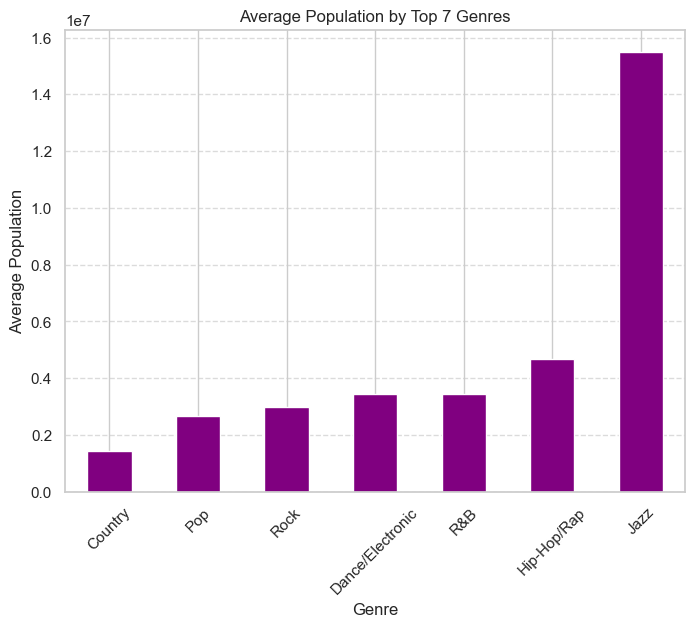

In [44]:
# Identify the top 7 genres based on frequency
top_7_genres = full_data["CLASSIFICATION_GENRE"].value_counts().head(7).index

# Filter dataset to only include the top 7 genres
filtered_df = full_data[full_data["CLASSIFICATION_GENRE"].isin(top_7_genres)]

# Calculate the average population for each of the top 7 genres
avg_population_by_genre = filtered_df.groupby("CLASSIFICATION_GENRE")["population"].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(8, 6))
avg_population_by_genre.plot(kind="bar", color="purple")

# Labels and title
plt.xlabel("Genre")
plt.ylabel("Average Population")
plt.title("Average Population by Top 7 Genres")
plt.xticks(rotation=45)  # Rotate genre labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


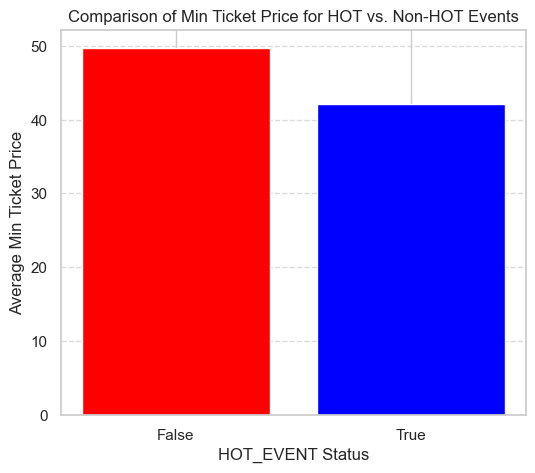

In [55]:
# Ensure HOT_EVENT is a boolean type (if not already)
full_data["HOT_EVENT"] = full_data["HOT_EVENT"].astype(bool)

# Calculate the average MIN_PRICE for HOT_EVENT = True and False
hot_event_avg_price = full_data.groupby("HOT_EVENT")["MIN_PRICE"].mean()

# Plot the comparison
plt.figure(figsize=(6, 5))
plt.bar(["False", "True"], hot_event_avg_price, color=["red", "blue"])

# Labels and title
plt.xlabel("HOT_EVENT Status")
plt.ylabel("Average Min Ticket Price")
plt.title("Comparison of Min Ticket Price for HOT vs. Non-HOT Events")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

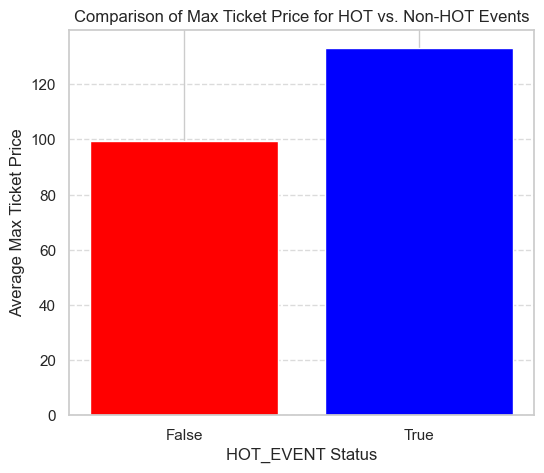

In [46]:
# Ensure HOT_EVENT is a boolean type (if not already)
full_data["HOT_EVENT"] = full_data["HOT_EVENT"].astype(bool)

# Calculate the average MIN_PRICE for HOT_EVENT = True and False
hot_event_avg_price = full_data.groupby("HOT_EVENT")["MAX_PRICE"].mean()

# Plot the comparison
plt.figure(figsize=(6, 5))
plt.bar(["False", "True"], hot_event_avg_price, color=["red", "blue"])

# Labels and title
plt.xlabel("HOT_EVENT Status")
plt.ylabel("Average Max Ticket Price")
plt.title("Comparison of Max Ticket Price for HOT vs. Non-HOT Events")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

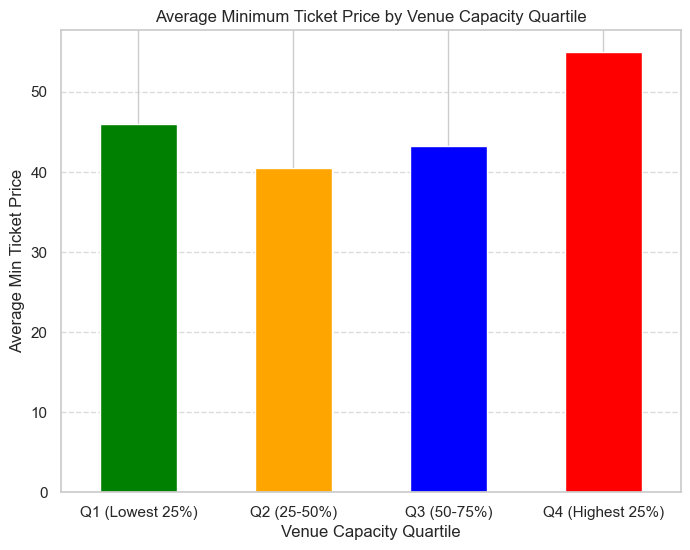

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure CAPACITY is numeric
full_data["CAPACITY"] = pd.to_numeric(full_data["CAPACITY"], errors="coerce")

# Define quartile-based capacity bins
full_data["capacity_quartile"] = pd.qcut(full_data["CAPACITY"], q=4, labels=["Q1 (Lowest 25%)", "Q2 (25-50%)", "Q3 (50-75%)", "Q4 (Highest 25%)"])

# Compute the average minimum ticket price for each quartile
avg_min_price_by_capacity = full_data.groupby("capacity_quartile")["MIN_PRICE"].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
avg_min_price_by_capacity.plot(kind="bar", color=["green", "orange", "blue", "red"])

# Labels and title
plt.xlabel("Venue Capacity Quartile")
plt.ylabel("Average Min Ticket Price")
plt.title("Average Minimum Ticket Price by Venue Capacity Quartile")
plt.xticks(rotation=0)  # Keep labels horizontal for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


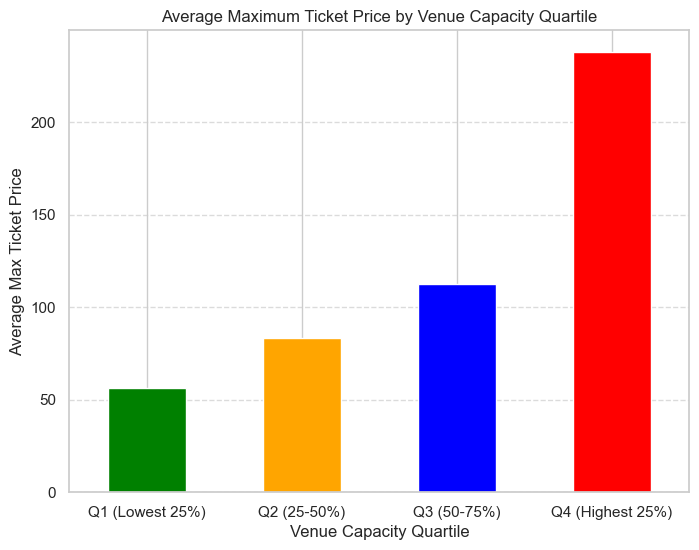

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure CAPACITY is numeric
full_data["CAPACITY"] = pd.to_numeric(full_data["CAPACITY"], errors="coerce")

# Define quartile-based capacity bins
full_data["capacity_quartile"] = pd.qcut(full_data["CAPACITY"], q=4, labels=["Q1 (Lowest 25%)", "Q2 (25-50%)", "Q3 (50-75%)", "Q4 (Highest 25%)"])

# Compute the average minimum ticket price for each quartile
avg_max_price_by_capacity = full_data.groupby("capacity_quartile")["MAX_PRICE"].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
avg_max_price_by_capacity.plot(kind="bar", color=["green", "orange", "blue", "red"])

# Labels and title
plt.xlabel("Venue Capacity Quartile")
plt.ylabel("Average Max Ticket Price")
plt.title("Average Maximum Ticket Price by Venue Capacity Quartile")
plt.xticks(rotation=0)  # Keep labels horizontal for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


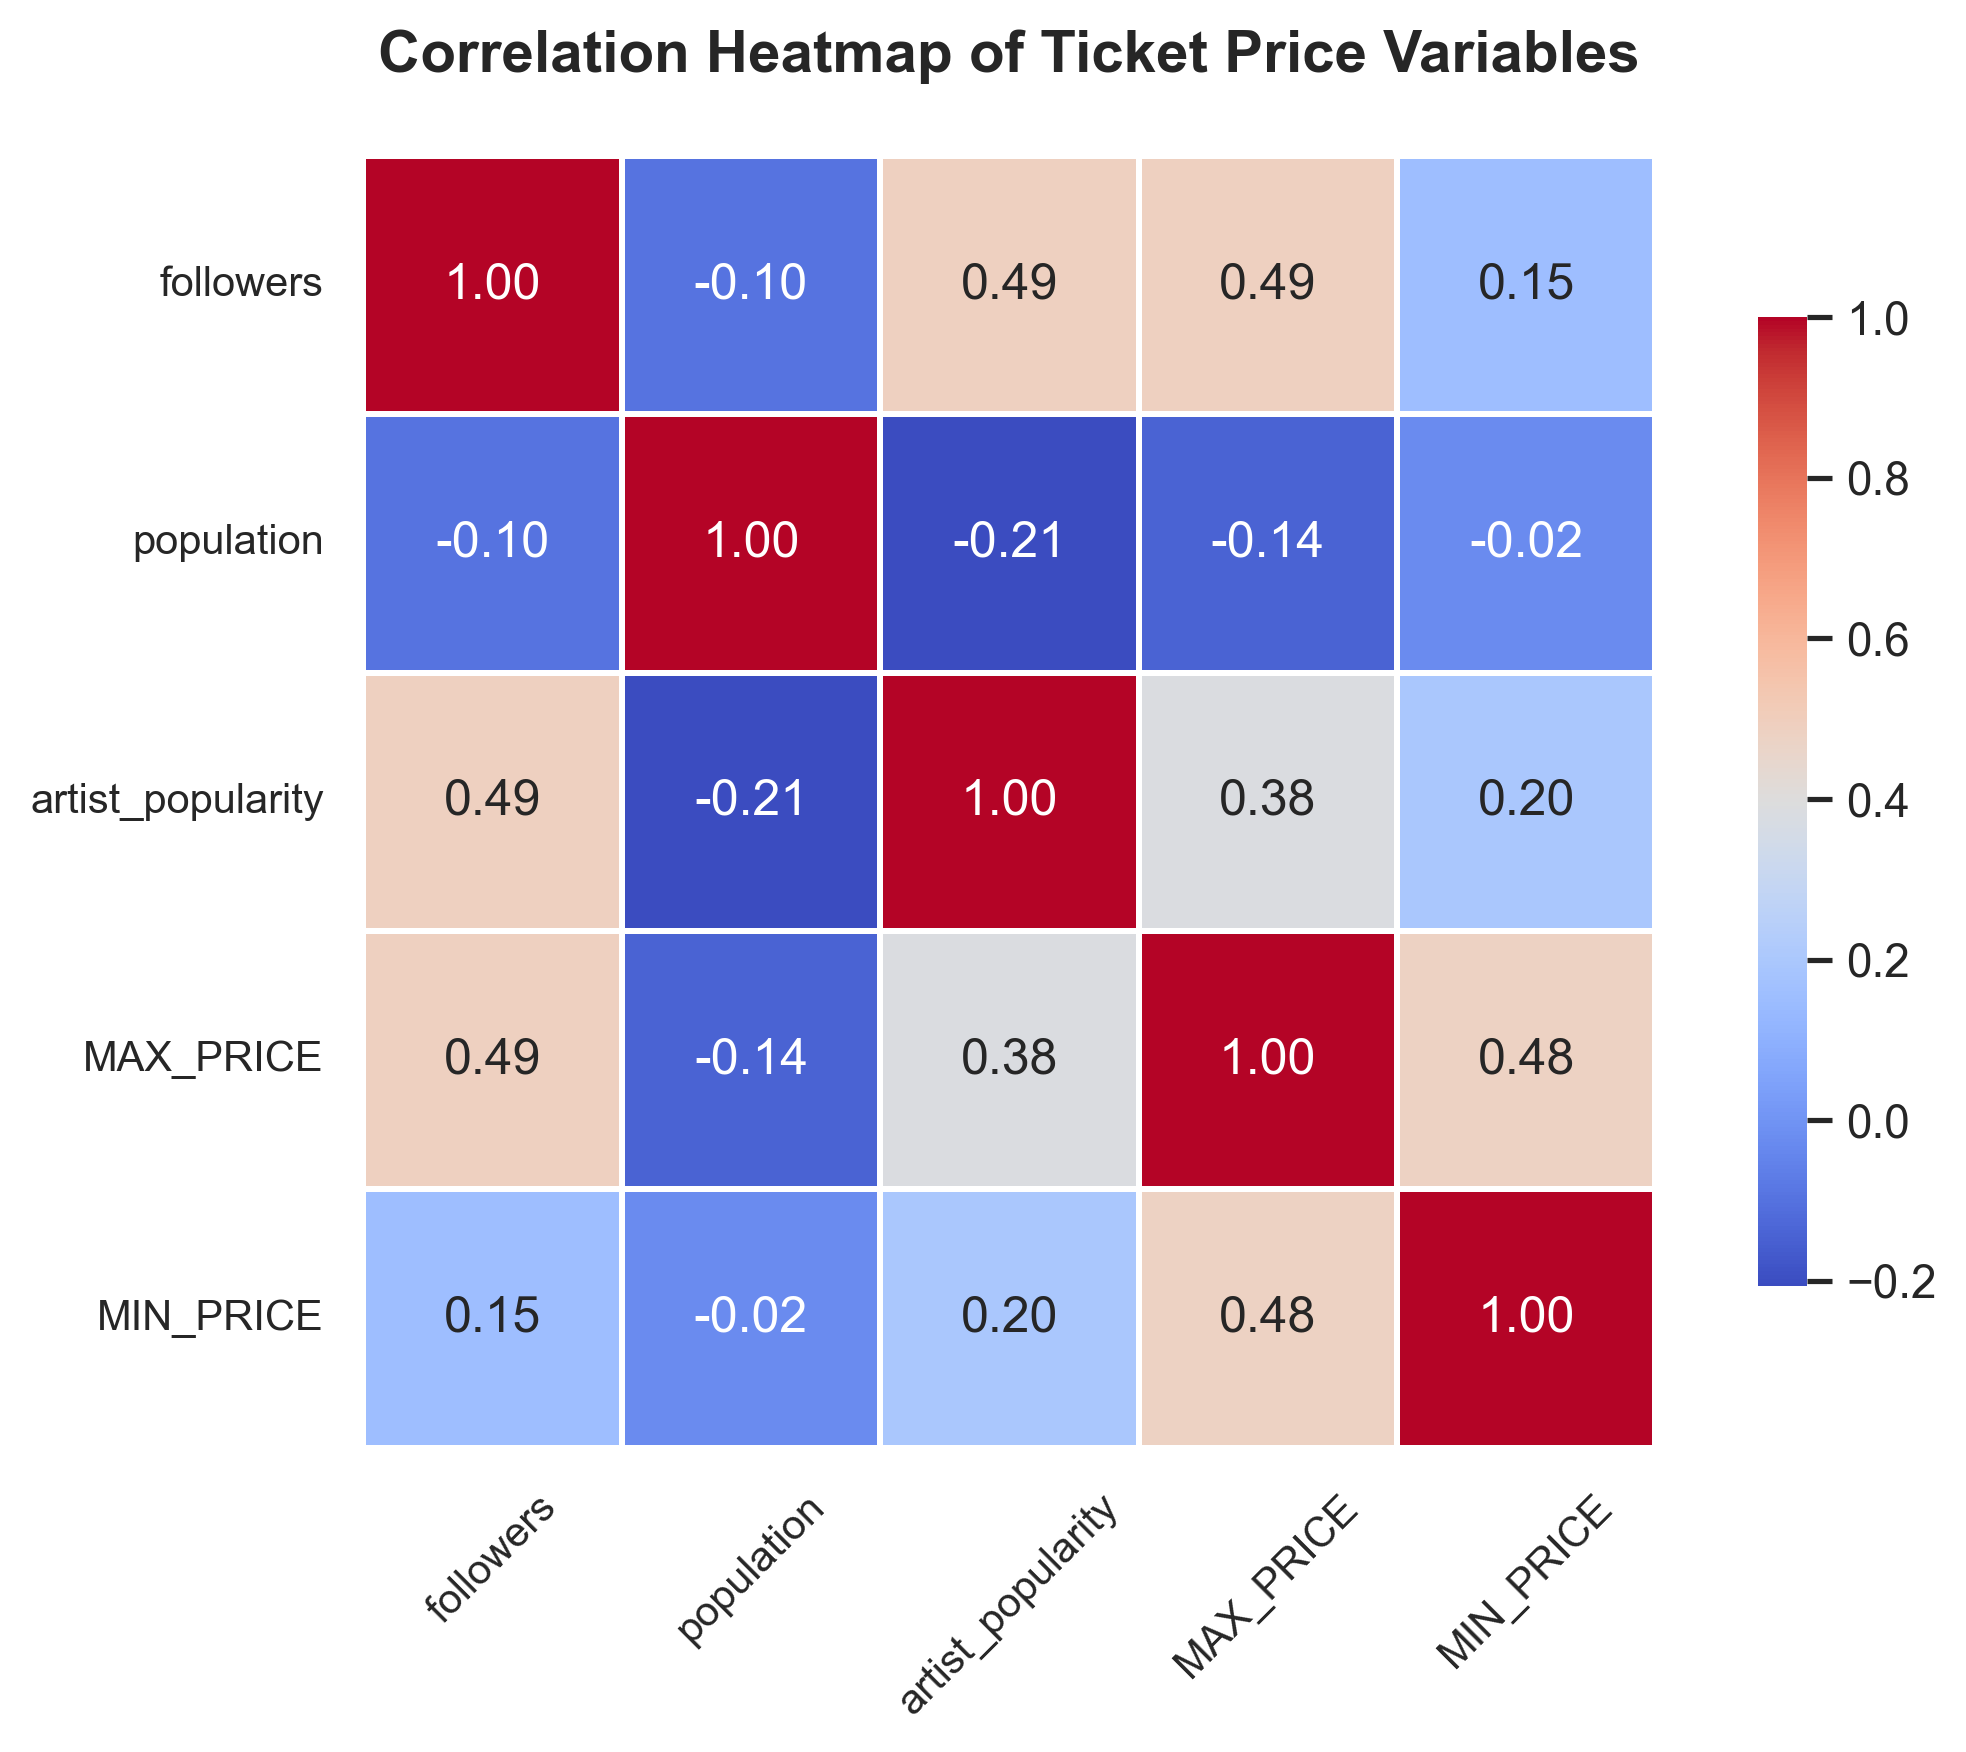

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric variables of interest (including MIN_PRICE)
numeric_vars = ["followers", "population", "artist_popularity", "MAX_PRICE", "MIN_PRICE"]
corr_matrix = full_data[numeric_vars].corr()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)  # High DPI for crisp PNG output

# Custom heatmap with improved styling
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f", 
            linewidths=1, 
            square=True, 
            cbar_kws={"shrink": 0.75}, 
            annot_kws={"size": 12}, 
            ax=ax)

# Custom title and labels
ax.set_title("Correlation Heatmap of Ticket Price Variables", fontsize=14, fontweight="bold", pad=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)

# Adjust layout
plt.tight_layout()


# Show the plot
plt.show()



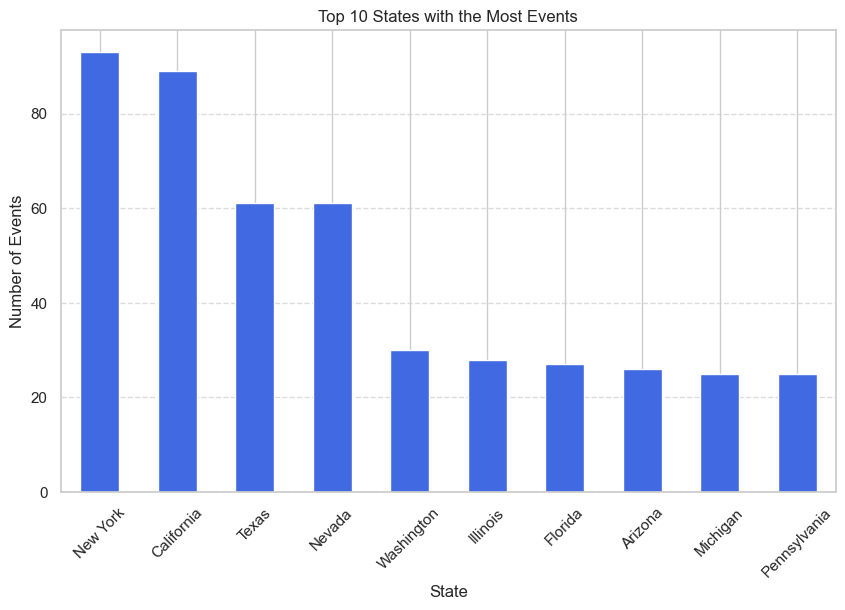

In [65]:
import matplotlib.pyplot as plt

# Ensure full_data is loaded before running this
# Count occurrences of each state in the dataset
top_10_states = full_data["state_name"].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_10_states.plot(kind="bar", color="royalblue")

# Labels and title
plt.xlabel("State")
plt.ylabel("Number of Events")
plt.title("Top 10 States with the Most Events")
plt.xticks(rotation=45)  # Rotate state labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


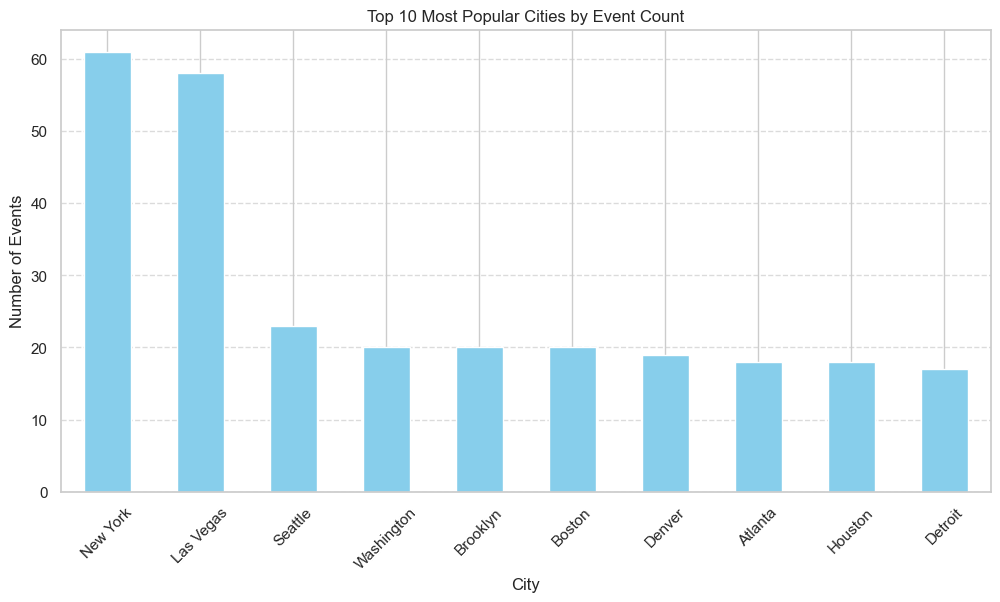

In [66]:
import matplotlib.pyplot as plt
# Count occurrences of each city
city_counts = full_data['VENUE_CITY'].value_counts().head(10)

# Plot bar graph
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='skyblue')

plt.xlabel("City")
plt.ylabel("Number of Events")
plt.title("Top 10 Most Popular Cities by Event Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

/var/folders/8h/xh3wy4j12tb1sjbxcy4hc9wm0000gn/T/ipykernel_16120/877344778.py:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Avg Min Ticket Price")


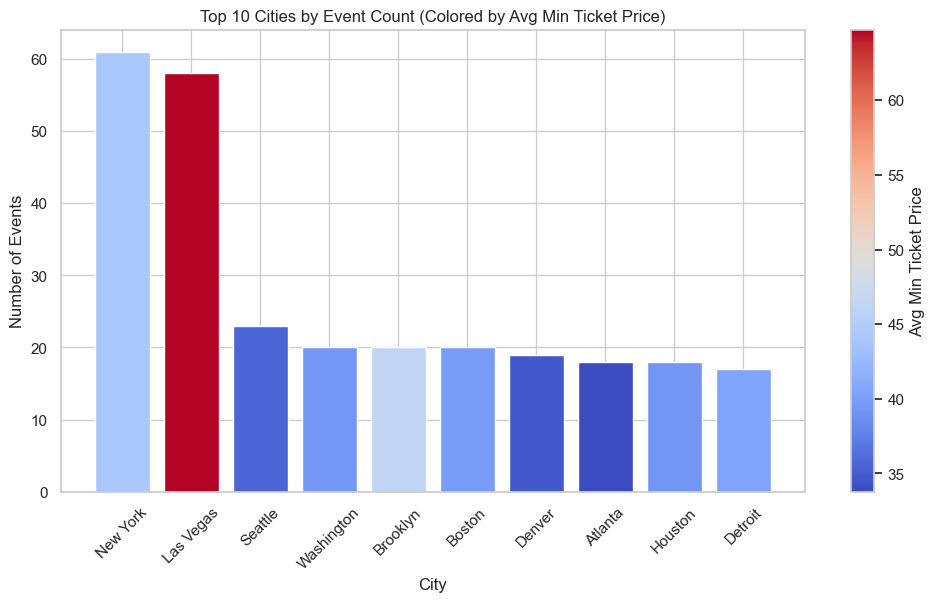

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute event counts and average MIN_PRICE for each city
city_event_counts = full_data["VENUE_CITY"].value_counts()
city_avg_price = full_data.groupby("VENUE_CITY")["MIN_PRICE"].mean()

# Get the top 10 cities by event count
top_10_cities = city_event_counts.head(10).index

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    "City": top_10_cities,
    "Event_Count": city_event_counts.loc[top_10_cities].values,
    "Avg_Min_Price": city_avg_price.loc[top_10_cities].values
})

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Normalize colors based on Avg_Min_Price
norm = plt.Normalize(plot_data["Avg_Min_Price"].min(), plot_data["Avg_Min_Price"].max())
colors = sns.color_palette("coolwarm", as_cmap=True)(norm(plot_data["Avg_Min_Price"].values))

# Create the bar plot with colors based on average min price
plt.figure(figsize=(12, 6))
bars = plt.bar(plot_data["City"], plot_data["Event_Count"], color=colors)

# Labels and title
plt.xlabel("City")
plt.ylabel("Number of Events")
plt.title("Top 10 Cities by Event Count (Colored by Avg Min Ticket Price)")
plt.xticks(rotation=45)

# Add color legend for Avg Min Price
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Avg Min Ticket Price")

# Show the plot
plt.show()


/var/folders/8h/xh3wy4j12tb1sjbxcy4hc9wm0000gn/T/ipykernel_16120/944082535.py:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Avg Max Ticket Price")


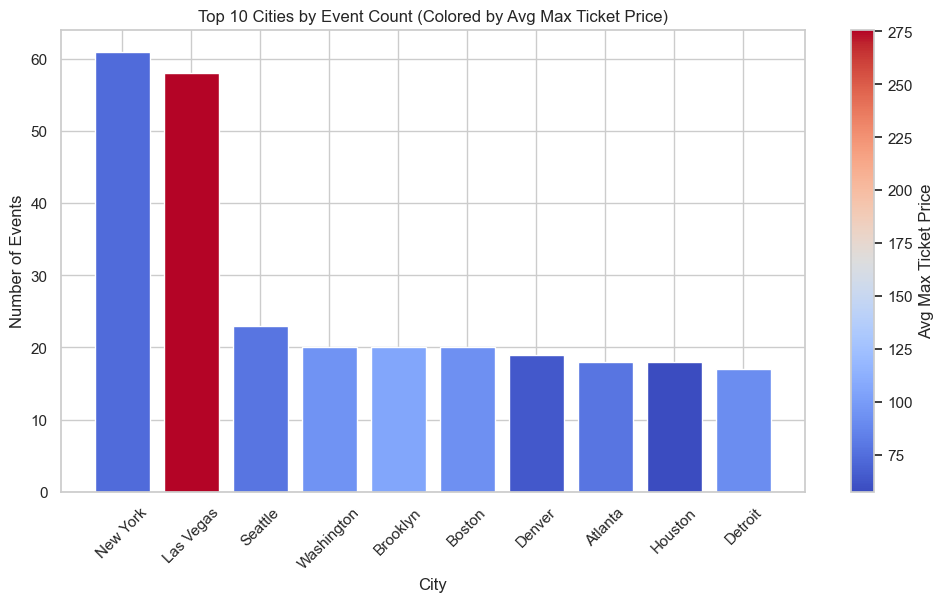

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute event counts and average MIN_PRICE for each city
city_event_counts = full_data["VENUE_CITY"].value_counts()
city_avg_price = full_data.groupby("VENUE_CITY")["MAX_PRICE"].mean()

# Get the top 10 cities by event count
top_10_cities = city_event_counts.head(10).index

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    "City": top_10_cities,
    "Event_Count": city_event_counts.loc[top_10_cities].values,
    "Avg_Max_Price": city_avg_price.loc[top_10_cities].values
})

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Normalize colors based on Avg_Min_Price
norm = plt.Normalize(plot_data["Avg_Max_Price"].min(), plot_data["Avg_Max_Price"].max())
colors = sns.color_palette("coolwarm", as_cmap=True)(norm(plot_data["Avg_Max_Price"].values))

# Create the bar plot with colors based on average min price
plt.figure(figsize=(12, 6))
bars = plt.bar(plot_data["City"], plot_data["Event_Count"], color=colors)

# Labels and title
plt.xlabel("City")
plt.ylabel("Number of Events")
plt.title("Top 10 Cities by Event Count (Colored by Avg Max Ticket Price)")
plt.xticks(rotation=45)

# Add color legend for Avg Min Price
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Avg Max Ticket Price")

# Show the plot
plt.show()

In [77]:
import plotly.express as px

# Ensure state names are mapped to abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Compute the average minimum price per state
state_avg_price = full_data.groupby("state_name")["MIN_PRICE"].mean().reset_index()

# Map state names to abbreviations
state_avg_price["state_code"] = state_avg_price["state_name"].map(state_abbrev)

# Drop rows with missing state codes
state_avg_price = state_avg_price.dropna()

# Create the choropleth map
fig = px.choropleth(
    state_avg_price,
    locations="state_code",
    locationmode="USA-states",
    color="MIN_PRICE",
    color_continuous_scale="Viridis_r",
    scope="usa",
    title="Average Minimum Concert Ticket Price by State",
    labels={"MIN_PRICE": "Avg Min Ticket Price"}
)

# Show the map
fig.show()



In [78]:


# Compute the average minimum price per state
state_avg_price = full_data.groupby("state_name")["MAX_PRICE"].mean().reset_index()

# Map state names to abbreviations
state_avg_price["state_code"] = state_avg_price["state_name"].map(state_abbrev)

# Drop rows with missing state codes
state_avg_price = state_avg_price.dropna()

# Create the choropleth map
fig = px.choropleth(
    state_avg_price,
    locations="state_code",
    locationmode="USA-states",
    color="MAX_PRICE",
    color_continuous_scale="Viridis_r",
    scope="usa",
    title="Average Maximum Concert Ticket Price by State",
    labels={"MAX_PRICE": "Avg Min Ticket Price"}
)

# Show the map
fig.show()


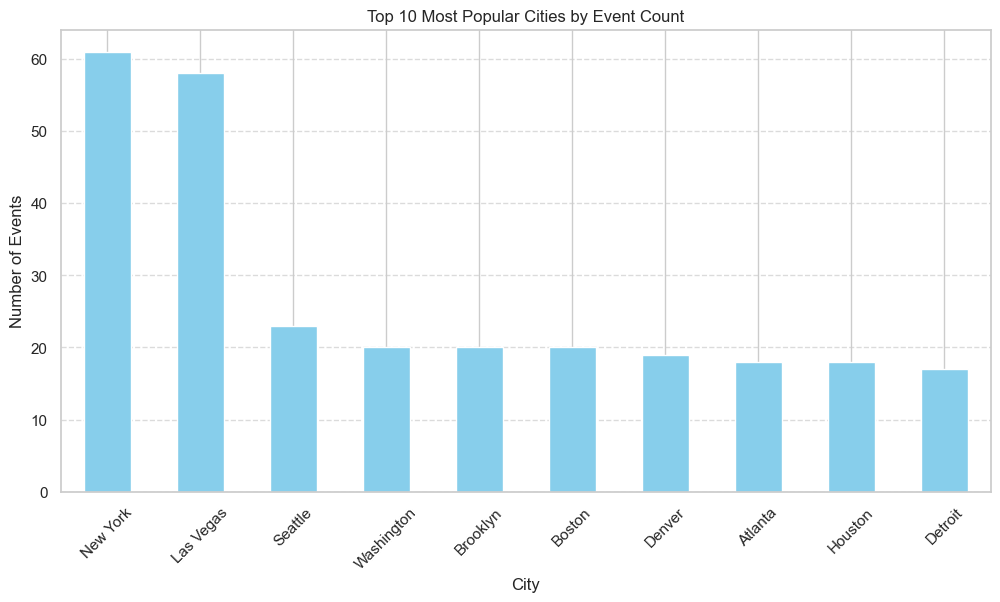

In [79]:

# Count occurrences of each city
city_counts = full_data['VENUE_CITY'].value_counts().head(10)

# Plot bar graph
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='skyblue')

plt.xlabel("City")
plt.ylabel("Number of Events")
plt.title("Top 10 Most Popular Cities by Event Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

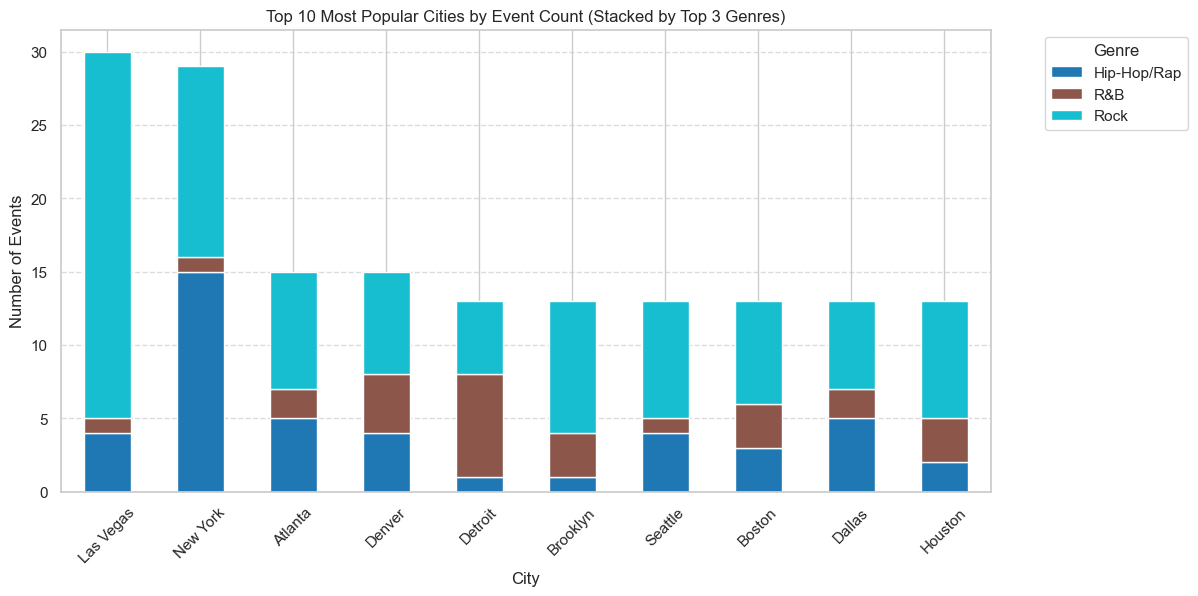

In [83]:


# Get the top 3 genres by total event count
top_genres = full_data['CLASSIFICATION_GENRE'].value_counts().head(3).index

# Filter dataset to only include events from the top 3 genres
filtered_genre_df = full_data[full_data['CLASSIFICATION_GENRE'].isin(top_genres)]

# Get the top 10 cities by event count
top_cities = filtered_genre_df['VENUE_CITY'].value_counts().head(10).index

# Further filter dataset to only include the top 10 cities
filtered_df = filtered_genre_df[filtered_genre_df['VENUE_CITY'].isin(top_cities)]

# Count occurrences of each genre in each city
city_genre_counts = filtered_df.pivot_table(index="VENUE_CITY", columns="CLASSIFICATION_GENRE", aggfunc="size", fill_value=0)

# Sort by total number of events
city_genre_counts = city_genre_counts.loc[top_cities]

# Plot stacked bar chart
city_genre_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")

plt.xlabel("City")
plt.ylabel("Number of Events")
plt.title("Top 10 Most Popular Cities by Event Count (Stacked by Top 3 Genres)")
plt.xticks(rotation=45)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


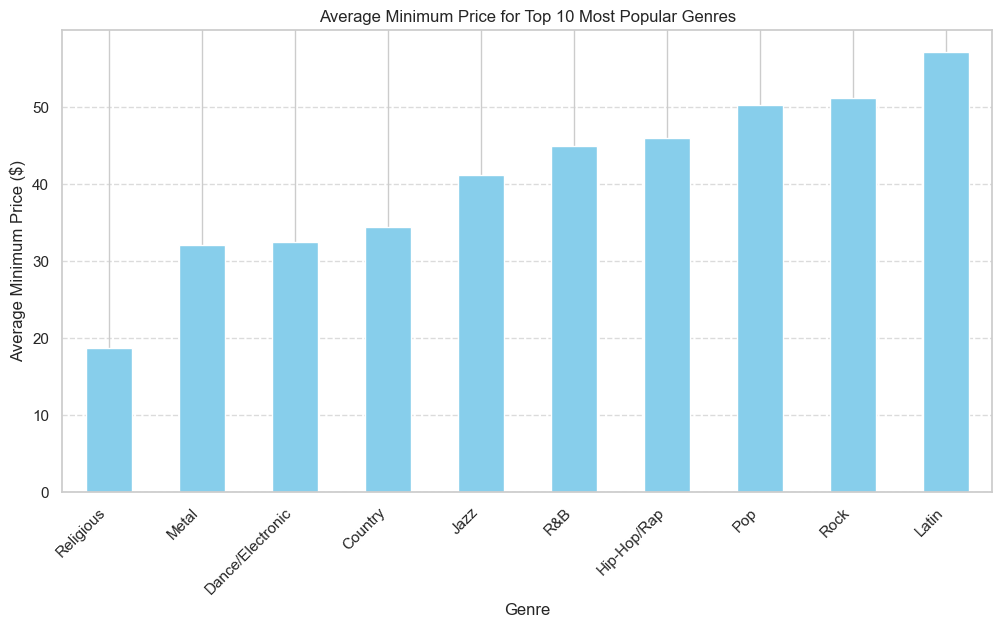

In [84]:
full_data['MIN_PRICE'] = pd.to_numeric(full_data['MIN_PRICE'], errors='coerce')

# Get the top 10 most popular genres by event count
top_10_genres = full_data['CLASSIFICATION_GENRE'].value_counts().head(10).index

# Filter data to only include the top 10 genres
filtered_df = full_data[full_data['CLASSIFICATION_GENRE'].isin(top_10_genres)]

# Calculate the average min price for the top 10 genres
avg_min_price_top_10_genres = filtered_df.groupby("CLASSIFICATION_GENRE")['MIN_PRICE'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(12, 6))
avg_min_price_top_10_genres.plot(kind="bar", color="skyblue")

plt.xlabel("Genre")
plt.ylabel("Average Minimum Price ($)")
plt.title("Average Minimum Price for Top 10 Most Popular Genres")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

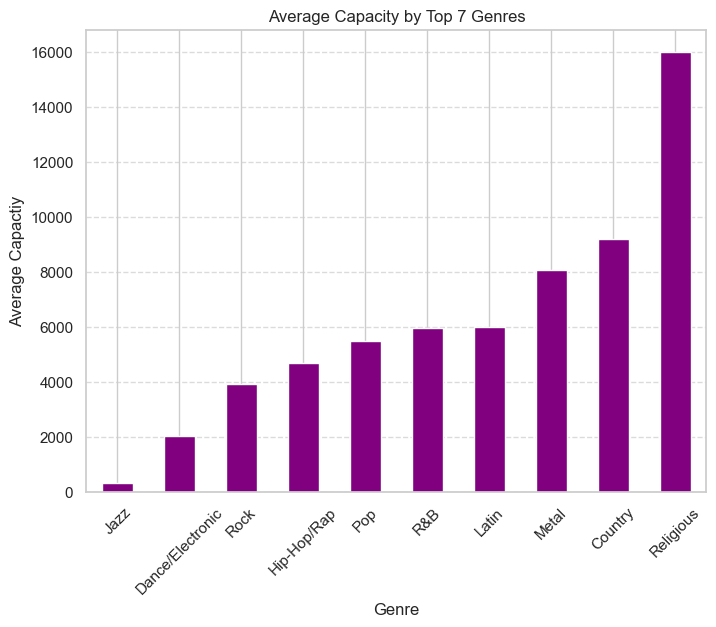

In [85]:
# Identify the top 7 genres based on frequency
top_7_genres = full_data["CLASSIFICATION_GENRE"].value_counts().head(10).index

# Filter dataset to only include the top 7 genres
filtered_df = full_data[full_data["CLASSIFICATION_GENRE"].isin(top_7_genres)]

# Calculate the average population for each of the top 7 genres
avg_population_by_genre = filtered_df.groupby("CLASSIFICATION_GENRE")["CAPACITY"].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(8, 6))
avg_population_by_genre.plot(kind="bar", color="purple")

# Labels and title
plt.xlabel("Genre")
plt.ylabel("Average Capactiy")
plt.title("Average Capacity by Top 7 Genres")
plt.xticks(rotation=45)  # Rotate genre labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()
